# Exercise 2-2: Write your own code for the Mortality Notebook

In [1]:
import pandas as pd

## Get the long and wide DataFrames

In [2]:
mortality_data = pd.read_csv('mortality.csv')

In [3]:
pd.to_pickle(mortality_data, "mortality_data.pkl")  

In [4]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [5]:
pd.to_pickle(mortality_data, "mortality_wide.pkl") 

In [6]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Work with the wide DataFrame

In [7]:
mortality_wide.head(5)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [8]:
mortality_wide.columns = mortality_wide.columns.str.replace(" ", "")

In [9]:
mortality_wide.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [10]:
mortality_wide.rename(columns={'DeathRate':'Deaths/100K'},inplace=True)

In [11]:
mortality_wide.columns

Index(['Year', 'AgeGroup', 'Deaths/100K'], dtype='object')

In [15]:
mortality_wide['MeanCentered'] = \
    mortality_wide['Deaths/100K'] - mortality_wide['Deaths/100K'].mean()

In [18]:
mortality_wide[['Year','MeanCentered']].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [19]:
mortality_wide.sort_values('Year', inplace=True)

In [20]:
mortality_wide.head(5)

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
357,1900,15-19 Years,484.8,291.87584
238,1900,10-14 Years,298.3,105.37584
119,1900,5-9 Years,466.1,273.17584
358,1901,15-19 Years,454.4,261.47584


In [21]:
mortality_wide.query('Year == 1915 or Year == 1916 or Year == 1917 or Year == 1918 or Year == 1919 or Year == 1920').tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
257,1919,10-14 Years,236.4,43.47584
19,1919,1-4 Years,928.0,735.07584
139,1920,5-9 Years,295.2,102.27584
377,1920,15-19 Years,402.9,209.97584
20,1920,1-4 Years,987.2,794.27584
258,1920,10-14 Years,229.9,36.97584


In [22]:
mortality_wide.query('AgeGroup == "1-4 Years"')[['Year','Deaths/100K']]

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [23]:
mortality_wide.sort_values('Deaths/100K', ascending=False).tail(3)

,Year,AgeGroup,Deaths/100K,MeanCentered
233,2014,5-9 Years,11.5,-181.42416
229,2010,5-9 Years,11.5,-181.42416
231,2012,5-9 Years,11.4,-181.52416


In [24]:
mortality_wide.sort_values('Deaths/100K', ascending=False).loc[[0,233,229,231]]

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
233,2014,5-9 Years,11.5,-181.42416
229,2010,5-9 Years,11.5,-181.42416
231,2012,5-9 Years,11.4,-181.52416


In [25]:
mortality_wide['Deaths/100K'].median()

89.5

In [26]:
mortality_wide['Deaths/100K'].mean()

192.92415966386574

In [28]:
mortality_wide.groupby('Year').head(10)

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
357,1900,15-19 Years,484.8,291.87584
238,1900,10-14 Years,298.3,105.37584
119,1900,5-9 Years,466.1,273.17584
358,1901,15-19 Years,454.4,261.47584
...,...,...,...,...
117,2017,1-4 Years,24.3,-168.62416
237,2018,5-9 Years,11.5,-181.42416
118,2018,1-4 Years,24.0,-168.92416
356,2018,10-14 Years,14.9,-178.02416


In [29]:
mortality_wide.groupby('Year').sum()

,Deaths/100K,MeanCentered
Year,,
1900,3233.0,2461.303361
1901,2850.6,2078.903361
1902,2733.0,1961.303361
1903,2659.1,1887.403361
1904,2793.1,2021.403361
...,...,...
2014,95.0,-676.696639
2015,99.5,-672.196639
2016,103.3,-668.396639


In [30]:
mortality_wide.head(5)

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
357,1900,15-19 Years,484.8,291.87584
238,1900,10-14 Years,298.3,105.37584
119,1900,5-9 Years,466.1,273.17584
358,1901,15-19 Years,454.4,261.47584


In [31]:
mortality_wide.index

Int64Index([  0, 357, 238, 119, 358, 120, 239,   1,   2, 359,
            ...
            116, 235, 355, 474, 236, 117, 237, 118, 356, 475],
           dtype='int64', length=476)

In [32]:
mortality_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          476 non-null    int64  
 1   AgeGroup      476 non-null    object 
 2   Deaths/100K   476 non-null    float64
 3   MeanCentered  476 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.6+ KB


In [34]:
mortality_wide.describe()

,Year,Deaths/100K,MeanCentered
count,476.000000,476.000000,4.760000e+02
mean,1959.000000,192.924160,-2.792612e-13
std,34.387268,293.224216,2.932242e+02
min,1900.000000,11.400000,-1.815242e+02
25%,1929.000000,40.575000,-1.523492e+02
50%,1959.000000,89.500000,-1.034242e+02
75%,1989.000000,222.575000,2.965084e+01
max,2018.000000,1983.800000,1.790876e+03


In [35]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1.959000e+03,34.387268,1900.00000,1929.00000,1959.00000,1989.00000,2018.00000
Deaths/100K,476.0,1.929242e+02,293.224216,11.40000,40.57500,89.50000,222.57500,1983.80000
MeanCentered,476.0,-2.792612e-13,293.224216,-181.52416,-152.34916,-103.42416,29.65084,1790.87584


In [36]:
mortality_wide.query('AgeGroup == "1-4 Years"')[['Year','AgeGroup']].head()

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years


In [37]:
mortality_wide.query('Year == 1915 or Year == 1916 or Year == 1917 or Year == 1918 or Year == 1919 or Year == 1920')

,Year,AgeGroup,Deaths/100K,MeanCentered
253,1915,10-14 Years,196.7,3.77584
372,1915,15-19 Years,330.9,137.97584
134,1915,5-9 Years,260.6,67.67584
15,1915,1-4 Years,924.2,731.27584
373,1916,15-19 Years,355.8,162.87584
16,1916,1-4 Years,1111.5,918.57584
135,1916,5-9 Years,282.4,89.47584
254,1916,10-14 Years,205.1,12.17584
374,1917,15-19 Years,380.3,187.37584
17,1917,1-4 Years,1066.0,873.07584


In [89]:
mortality_wide.query('(Year == 1915 or Year == 1916 or Year == 1917 or Year == 1918 or Year == 1919 or Year == 1920)and(AgeGroup == "1-4 Years")')

,Year,AgeGroup,Deaths/100K,MeanCentered,TotalDeaths
15,1915,1-4 Years,924.2,731.27584,NaN
16,1916,1-4 Years,1111.5,918.57584,NaN
17,1917,1-4 Years,1066.0,873.07584,NaN
18,1918,1-4 Years,1573.5,1380.57584,NaN
19,1919,1-4 Years,928.0,735.07584,NaN
20,1920,1-4 Years,987.2,794.27584,NaN


In [47]:
mortality_wide.groupby('Year')['Deaths/100K'] \
    .agg(['mean','median','sum'])

,mean,median,sum
Year,,,
1900,808.250,475.45,3233.0
1901,712.650,441.00,2850.6
1902,683.250,412.40,2733.0
1903,664.775,424.40,2659.1
1904,698.275,448.20,2793.1
...,...,...,...
2014,23.750,19.00,95.0
2015,24.875,19.75,99.5
2016,25.825,19.95,103.3


In [76]:
mortality_wide.groupby('Year')['Deaths/100K'].sum()

Year
1900    3233.0
1901    2850.6
1902    2733.0
1903    2659.1
1904    2793.1
         ...  
2014      95.0
2015      99.5
2016     103.3
2017     102.9
2018      99.6
Name: Deaths/100K, Length: 119, dtype: float64

<AxesSubplot:xlabel='Year'>

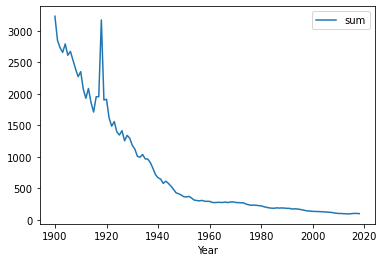

In [85]:
mortality_wide.groupby('Year')['Deaths/100K'] \
    .agg(['sum']).plot.line()